The United States Bureau of Labor Statistics (BLS) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate isn't perfect, it's a commonly used proxy for the health of the economy. You may have heard politicians and reporters state the unemployment rate when commenting on the economy. You can read more about how the BLS calculates the unemployment rate here.

The BLS releases monthly unemployment data available for download as an Excel file, with the .xlsx file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file from the website of the Federal Reserve Bank of St. Louis. We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as unrate.csv, and made it available in this mission.

To download this dataset on your own, head to the Federal Reserve Bank of St. Louis's website, select Text, Comma Separated as the File Format, make sure the Date Range field starts at 1948-01-01 and ends at 2016-08-01.

Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a time series dataset, which means the data points (monthly unemployment rates) are ordered by time. Here's a preview of the dataset:

DATE	VALUE

1948-01-01	3.4

1948-02-01	3.8

1948-03-01	4.0

1948-04-01	3.9

1948-05-01	3.5

When we read the dataset into a DataFrame, pandas will set the data type of the DATE column as a text column. Because of how pandas reads in strings internally, this column is given a data type of object. We need to convert this column to the datetime type using the pandas.to_datetime() function, which returns a Series object with the datetime data type that we can assign back to the DataFrame:

import pandas as pd

df['col'] = pd.to_datetime(df['col'])

Instructions
- Read unrate.csv into a DataFrame and assign to unrate.
- Use the pandas.to_datetime function to convert the DATE column into a series of datetime values.
- Display the first 12 rows in unrate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Unemployment rate data from USBLS from Jan 1948 to Aug 2016

unrate = pd.read_csv("unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate["DATE"])
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


We can make the following observations from the table:

- In 1948:
    - monthly unemployment rate ranged between 3.4 and 4.0.
    - highest unemployment rate was reached in both March and December.
    - lowest unemployment rate was reached in January.
    - From January to March, unemployment rate trended up.
    - From March to May, unemployment rate trended down.
    - From May to August, unemployment rate trended up.
    - From August to October, unemployment rate trended down.
    - From October to December, unemployment rate trended up.

Because the table only contained the data from 1948, it didn't take too much time to identify these observations. If we scale up the table to include all 824 rows, it would be very time-consuming and painful to understand. Tables shine at presenting information precisely at the intersection of rows and columns and allow us to perform quick lookups when we know the row and column we're interested in. In addition, problems that involve comparing values between adjacent rows or columns are well suited for tables. Unfortunately, many problems you'll encounter in data science require comparisons that aren't possible with just tables.

For example, one thing we learned from looking at the monthly unemployment rates for 1948 is that every few months, the unemployment rate switches between trending up and trending down. It's not switching direction every month, however, and this could mean that there's a seasonal effect. Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further. The faster we're able to assess our data, the faster we can perform high-level analysis quickly. If we're reliant on just the table to help us figure this out, then we won't be able to perform a high level test quickly. Let's see how a visual representation of the same information can be more helpful than the table representation.

Instructions

- Generate a line chart that visualizes the unemployment rates from 1948:
- x-values should be the first 12 values in the DATE column
- y-values should be the first 12 values in the VALUE column
- Display the plot.

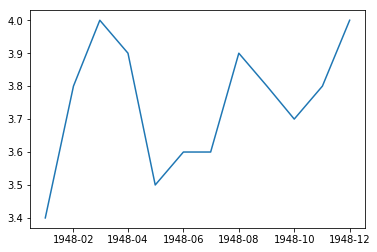

In [3]:
fortyeight = unrate.iloc[:12]
plt.plot(fortyeight["DATE"], fortyeight["VALUE"])
plt.show()

Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
- x-values should be the first 12 values in the DATE column
- y-values should be the first 12 values in the VALUE column
- Use pyplot.xticks() to rotate the x-axis tick labels by 90 degrees.
- Display the plot.

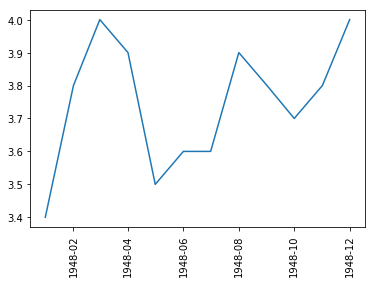

In [4]:
plt.plot(fortyeight["DATE"], fortyeight["VALUE"])
plt.xticks(rotation="vertical")
plt.show()

Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:

- x-values should be the first 12 values in the DATE column
- y-values should be the first 12 values in the VALUE column
- Rotate the x-axis tick labels by 90 degrees.
- Set the x-axis label to "Month".
- Set the y-axis label to "Unemployment Rate".
- Set the plot title to "Monthly Unemployment Trends, 1948".
- Display the plot.

Text(0.5,1,'Monthly Unemployment Trends, 1948')

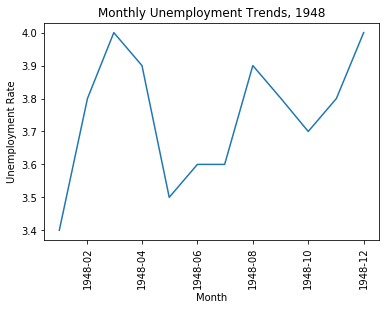

In [5]:
plt.plot(fortyeight["DATE"], fortyeight["VALUE"])
plt.xticks(rotation="vertical")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a Figure object)
- a container for the plot was positioned on a grid (the plot returned as an Axes object)
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling pyplot.figure():

- fig = plt.figure()

Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
    - markers
    - lines
    - gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object, which needs to be assigned to a variable:

- axes_obj = fig.add_subplot(nrows, ncols, plot_number)

If we want the figure to contain 2 plots, one above the other, we need to write:

- ax1 = fig.add_subplot(2,1,1)
- ax2 = fig.add_subplot(2,1,2)

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using plt.show():

- import matplotlib.pyplot as plt
- fig = plt.figure()
- ax1 = fig.add_subplot(2,1,1)
- ax2 = fig.add_subplot(2,1,2)
- plt.show()

Let's create a figure, add subplots to it, and display it.

- Use plt.figure() to create a figure and assign to fig.
- Use Figure.add_subplot() to create two subplots above and below each other
- Assign the top Axes object to ax1.
- Assign the bottom Axes object to ax2.
- Use plt.show() to display the resulting plot.

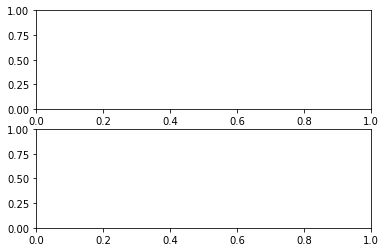

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

To generate a line chart within an Axes object, we need to call Axes.plot() and pass in the data you want plotted:

- x_values = [0.0, 0.5, 1.0]
- y_values = [10, 20, 40]
- ax1.plot(x_values, y_values)

Like pyplot.plot(), the Axes.plot() will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also use generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call Axes.plot() and pass in the data we want to use in that plot.

Instructions
- Create 2 line subplots in a 2 row by 1 column layout:
- In the top subplot, plot the data from 1948.
    - For the x-axis, use the first 12 values in the DATE column.
    - For the y-axis, use the first 12 values in the VALUE column.
- In the bottom subplot, plot the data from 1949.
    - For the x-axis, use the values from index 12 to 24 in the DATE column.
    - For the y-axis, use the values from index 12 to 24 in the VALUE column.
- Use plt.show() to display all the plots.

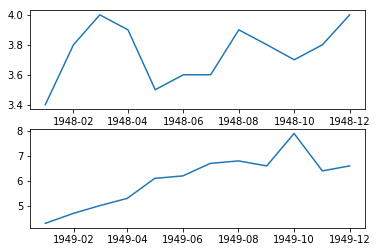

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

x1 = unrate['DATE'].iloc[:12]
y1 = unrate['VALUE'].iloc[:12]
x2 = unrate['DATE'].iloc[12:24]
y2 = unrate['VALUE'].iloc[12:24]

ax1.plot(x1, y1)
ax2.plot(x2, y2)

plt.show()

For the plot we generated in the last screen, set the width of the plotting area to 12 inches and the height to 5 inches.

- fig = plt.figure(figsize=(width, height))

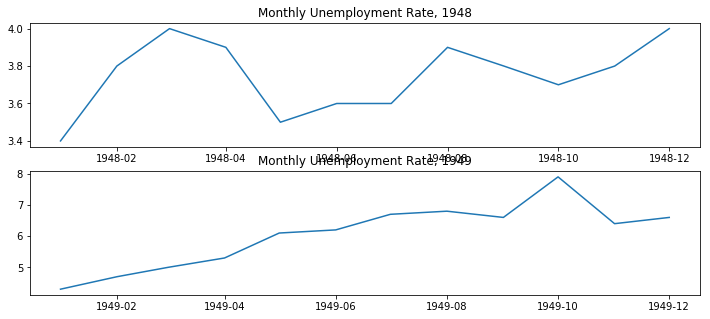

In [8]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

Let's visualize data from a few more years to see if we find any evidence for seasonality between those years.
 
- Set the width of the plotting area to 12 inches and the height to 12 inches.
- Generate a grid with 5 rows and 1 column and plot data from the individual years. Start with 1948 in the top subplot and end with 1952 in the bottom subplot.
- Use plt.show() to display the plots.

In [9]:
fig = plt.figure(figsize=(12, 12))

for i in range(5):
    ax = fig.add_subplot(5, 1, i + 1)
    ax.plot(unrate['DATE'].iloc[i*12:(i+1)*12], unrate['VALUE'].iloc[i*12:(i+1)*12])

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

unrate['MONTH'] = unrate['DATE'].dt.monthplt.show()

SyntaxError: invalid syntax (<ipython-input-9-81d085fb1de9>, line 7)

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

unrate['MONTH'] = unrate['DATE'].dt.month

- Set the plotting area to a width of 6 inches and a height of 3 inches.
- Generate 2 line charts in the base subplot, using the MONTH column for the x-axis instead of the DATE column:
    - One line chart using data from 1948, with the line color set to "red".
    - One line chart using data from 1949, with the line color set to "blue".
- Use plt.show() to display the plots.

In [ ]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(6, 3))
plt.plot(unrate['MONTH'].iloc[:12], unrate['VALUE'].iloc[:12], c='red')
plt.plot(unrate['MONTH'].iloc[12:24], unrate['VALUE'].iloc[12:24], c='blue')

plt.show()

Let's visualize 5 years worth of unemployment rates on the same subplot.

- Set the plotting area to a width of 10 inches and a height of 6 inches.
- Generate the following plots in the base subplot:
    - 1948: set the line color to "red"
    - 1949: set the line color to "blue"
    - 1950: set the line color to "green"
    - 1951: set the line color to "orange"
    - 1952: set the line color to "black"
- Use plt.show() to display the plots.

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(unrate['MONTH'].iloc[:12], unrate['VALUE'].iloc[:12], c='red')
plt.plot(unrate['MONTH'].iloc[12:24], unrate['VALUE'].iloc[12:24], c='blue')
plt.plot(unrate['MONTH'].iloc[24:36], unrate['VALUE'].iloc[24:36], c='green')
plt.plot(unrate['MONTH'].iloc[36:48], unrate['VALUE'].iloc[36:48], c='orange')
plt.plot(unrate['MONTH'].iloc[48:60], unrate['VALUE'].iloc[48:60], c='black')

plt.show()

- Modify the code from the last screen that overlaid 5 plots to include a legend. Use the year value for each line chart as the label.
    - E.g. the plot of 1948 data that uses "red" for the line color should be labeled "1948" in the legend.
- Place the legend in the "upper left" corner of the plot.
- Display the plot using plt.show().

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=str(1948 + i))
plt.legend(loc='upper left')
plt.show()

Modify the code from the last screen:

- Set the title to "Monthly Unemployment Trends, 1948-1952".
- Set the x-axis label to "Month, Integer".
- Set the y-axis label to "Unemployment Rate, Percent".

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')

plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month")
plt.xlabel("Unemployment Rate")
plt.show()